In [ ]:
!pip install gymnasium

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

In [ ]:
robot_img = mpimg.imread('/content/robot.png')
dirty_img = mpimg.imread('/content/dirt.png')
clean_img = mpimg.imread('/content/clean.png')
obstacle_img = mpimg.imread('/content/obstacle.png')

In [ ]:
class VacuumCleanerEnv(gym.Env):
    def __init__(self):
        super(VacuumCleanerEnv, self).__init__()
        self.grid_size = 5
        self.state = (0, 0)
        self.dirty_cells = set([(1, 1), (2, 3), (3, 0), (4, 4)])
        self.obstacles = set([(0, 4), (3, 3), (1, 2)])
        self.cleaned_cells = set()
        for r in range(self.grid_size):
            for c in range(self.grid_size):
                if (r, c) not in self.dirty_cells and (r, c) not in self.obstacles:
                    self.cleaned_cells.add((r, c))
        # Action space initialisation
        self.action_space = spaces.Discrete(6)
        # Observation space
        self.observation_space = spaces.Tuple((
            spaces.Discrete(self.grid_size),
            spaces.Discrete(self.grid_size)
        ))


    def step(self, action):
        row, col = self.state
        self.previous_state = self.state
        new_state = self.state
        reward = -1  # Any default movement penalty.
        reason = ""
        # Actions and their rewards.
        if action == 0:  # Move up
            if row > 0:
                new_state = (row - 1, col)
                reason = "Moved up"
            else:
                reward = -8
                reason = "Went out of boundary - up"
        elif action == 1:  # Move down
            if row < self.grid_size - 1:
                new_state = (row + 1, col)
                reason = "Moved down"
            else:
                reward = -8
                reason = "Went out of boundary - down"
        elif action == 2:  # Move left
            if col > 0:
                new_state = (row, col - 1)
                reason = "Moved left"
            else:
                reward = -8
                reason = "Went out of boundary - left"
        elif action == 3:  # Move right
            if col < self.grid_size - 1:
                new_state = (row, col + 1)
                reason = "Moved right"
            else:
                reward = -8
                reason = "Went out of boundary - right"
        elif action == 4:  # Clean
            if self.state in self.dirty_cells:
                self.dirty_cells.remove(self.state)
                self.cleaned_cells.add(self.state)
                reward = 20
                reason = "Cleaned dirty cell"
            else:
                reward = -2
                reason = "Cleaned an already clean cell"
        elif action == 5:  # Stay
            reward = -3
            reason = "Stayed in the same position"
        if new_state in self.obstacles:
            reward = -10
            reason = "Ran into an obstacle"
            new_state = self.state
        if new_state != self.state and action in [0, 1, 2, 3]:
            dirty_dist_before = min([abs(row - r) + abs(col - c) for r, c in self.dirty_cells], default=0)
            dirty_dist_after = min([abs(new_state[0] - r) + abs(new_state[1] - c) for r, c in self.dirty_cells], default=0)
            if dirty_dist_after < dirty_dist_before:
                reward = 4
                reason = "Moved closer to dirty cell"
        self.state = new_state
        if self.state in self.dirty_cells and action != 4:
            reward = -5
            reason = "On dirty cell but did not clean"
        self.render()
        print(f"Current State: {self.state}")
        print(f"Previous State: {self.previous_state}")
        print(f"Action Taken: {action_names[action]}")
        print(f"Reward: {reward}")
        print(f"Reason: {reason}")
        done = len(self.dirty_cells) == 0
        return self.state, reward, done, {}


    def reset(self):
        self.state = (0, 0)
        self.dirty_cells = {
            (1, 1), (2, 3), (3, 0), (4, 4)
        }
        self.cleaned_cells = set()
        for r in range(self.grid_size):
            for c in range(self.grid_size):
                if (r, c) not in self.dirty_cells and (r, c) not in self.obstacles:
                    self.cleaned_cells.add((r, c))
        return self.state


    def render(self):
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.clear()
        ax.set_xticks(np.arange(self.grid_size + 1) - 0.5)
        ax.set_yticks(np.arange(self.grid_size + 1) - 0.5)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(color='black', linestyle='-', linewidth=0.5)
        for r in range(self.grid_size):
            for c in range(self.grid_size):
                if (r, c) in self.dirty_cells:
                    ax.imshow(dirty_img, extent=[c - 0.5, c + 0.5, r - 0.5, r + 0.5], aspect='auto', zorder=0)
                elif (r, c) in self.cleaned_cells:
                    ax.imshow(clean_img, extent=[c - 0.5, c + 0.5, r - 0.5, r + 0.5], aspect='auto', zorder=0)
                elif (r, c) in self.obstacles:
                    ax.imshow(obstacle_img, extent=[c - 0.5, c + 0.5, r - 0.5, r + 0.5], aspect='auto', zorder=0)
        ax.imshow(robot_img, extent=[
            self.state[1] - 0.5, self.state[1] + 0.5,
            self.state[0] - 0.5, self.state[0] + 0.5
        ], aspect='auto', zorder=1)
        ax.set_xlim([-0.5, self.grid_size - 0.5])
        ax.set_ylim([-0.5, self.grid_size - 0.5])
        ax.invert_yaxis()
        ax.set_aspect('equal')
        plt.title("Vacuum Cleaner Environment")
        plt.show()


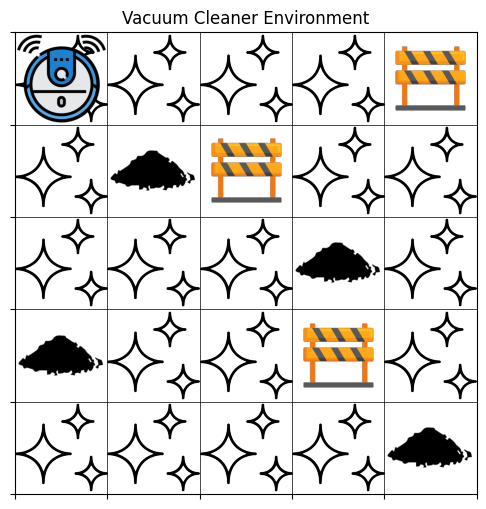

Current State: (0, 0)
Previous State: (0, 0)
Action Taken: Move Left
Reward: -8
Reason: Went out of boundary - left


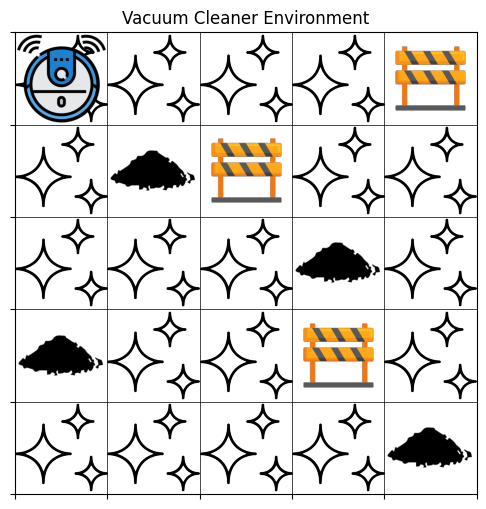

Current State: (0, 0)
Previous State: (0, 0)
Action Taken: Stay
Reward: -3
Reason: Stayed in the same position


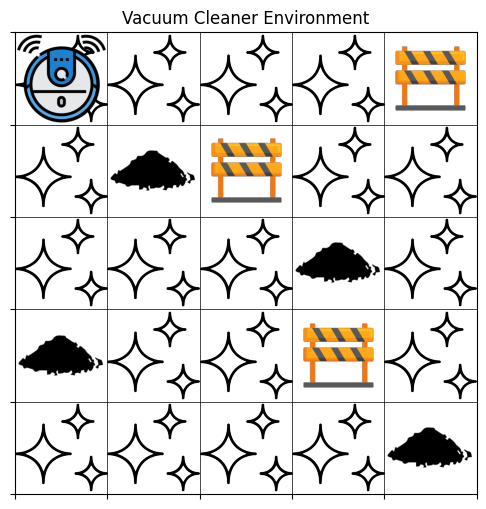

Current State: (0, 0)
Previous State: (0, 0)
Action Taken: Move Up
Reward: -8
Reason: Went out of boundary - up


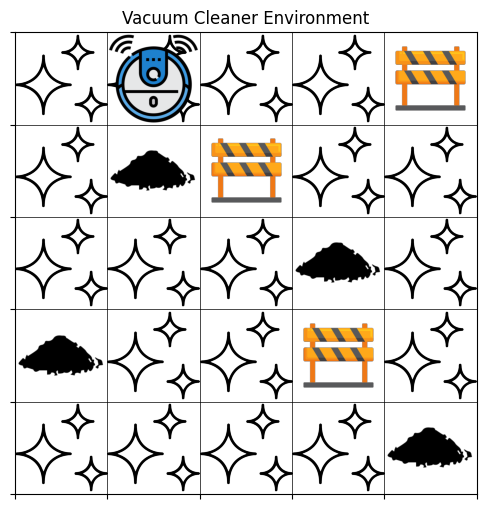

Current State: (0, 1)
Previous State: (0, 0)
Action Taken: Move Right
Reward: 4
Reason: Moved closer to dirty cell


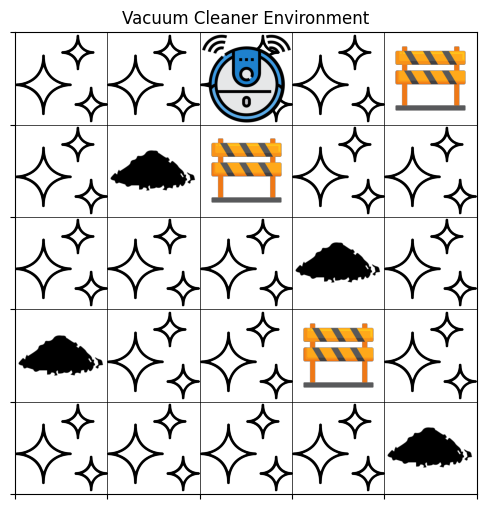

Current State: (0, 2)
Previous State: (0, 1)
Action Taken: Move Right
Reward: -1
Reason: Moved right


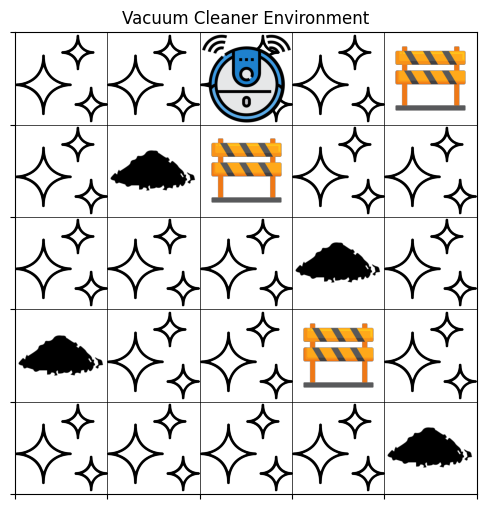

Current State: (0, 2)
Previous State: (0, 2)
Action Taken: Move Down
Reward: -10
Reason: Ran into an obstacle


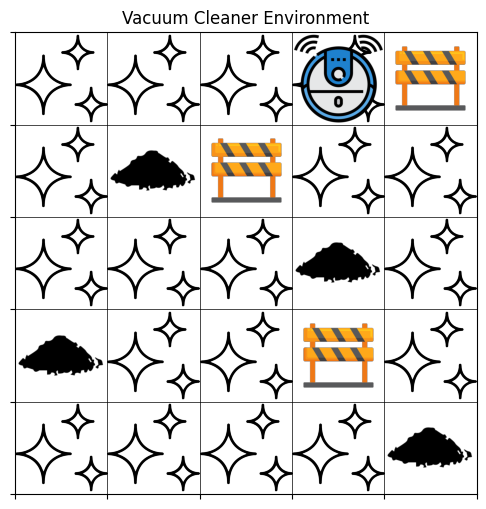

Current State: (0, 3)
Previous State: (0, 2)
Action Taken: Move Right
Reward: -1
Reason: Moved right


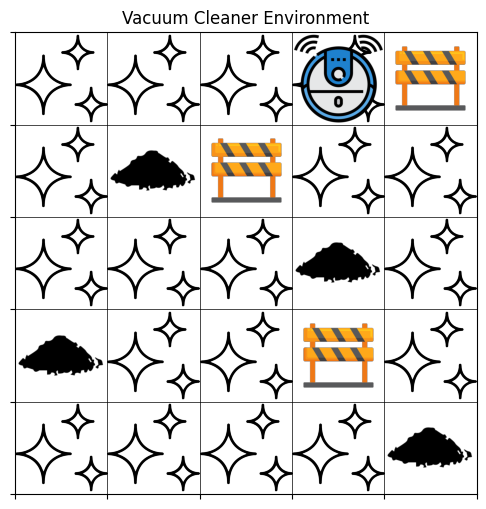

Current State: (0, 3)
Previous State: (0, 3)
Action Taken: Clean
Reward: -2
Reason: Cleaned an already clean cell


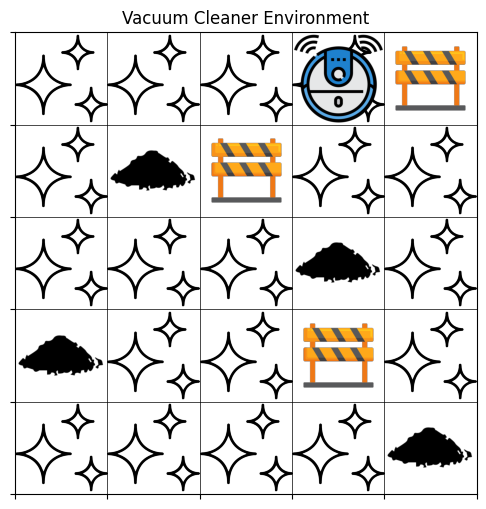

Current State: (0, 3)
Previous State: (0, 3)
Action Taken: Clean
Reward: -2
Reason: Cleaned an already clean cell


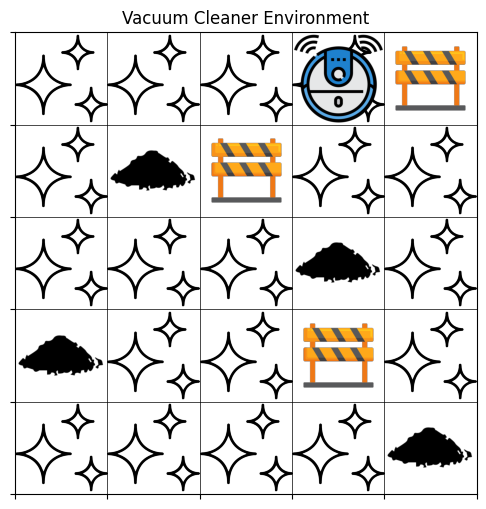

Current State: (0, 3)
Previous State: (0, 3)
Action Taken: Move Right
Reward: -10
Reason: Ran into an obstacle
Total Reward: -41


In [ ]:
action_names = {
    0: "Move Up",
    1: "Move Down",
    2: "Move Left",
    3: "Move Right",
    4: "Clean",
    5: "Stay"
}
env = VacuumCleanerEnv()
state = env.reset()
total_reward = 0
for t in range(10):
    action = env.action_space.sample()
    next_state, reward, done, _ = env.step(action)
    state = next_state
    total_reward += reward
    if done:
        print("Environment solved.")
        break
print(f"Total Reward: {total_reward}")